In [ ]:
#DAY 2 OF INTRODUCTION TO MACHINE LEARNING.
# THIS NOTEBOOK EXPLORES LOGISTIC REGRESSION
# AUTHOR: LAWRENCE
# BOOK USED: INTRO TO MACHINE LEARNING
# LETS DIVE IN.


In [3]:
# LOGISTIC REGRESSION & SUPPORT VECTOR MACHINES USED FOR CLASSIFICATION.
# BOTH BINARY AND MULTICLASS CLASSIFICATION.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd 
import numpy as np 


In [4]:
#IMPORTING DATASETS TO USE FOR MODELLING.
import mglearn
X, y = mglearn.datasets.make_forge()


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


C:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


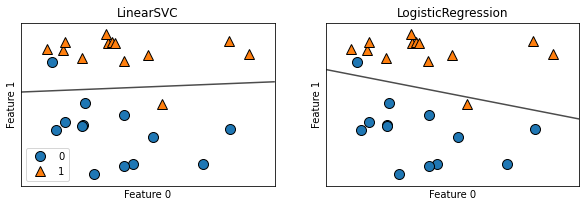

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1,2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps= 0.5,
                                ax=ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


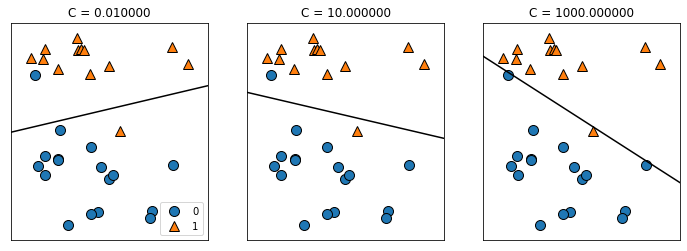

In [8]:
mglearn.plots.plot_linear_svc_regularization()

In [9]:
# HONESTLY TYPING THIS MGLEARN GOT ME GOING CRAZY
# I DONT GET IT AT ALL

# TRYING THE BREAST CANCER DATASET.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.951
Test set score: 0.951


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#NOW TRYING OUT WITH C HYPER PARAMETER

logreg1 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


Training accuracy of l1 logreg with C=0.001: 0.95
Training accuracy of l1 logreg with C=0.001: 0.94
Training accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.98
Training accuracy of l1 logreg with C=100.000: 0.97


TypeError: range() takes no keyword arguments

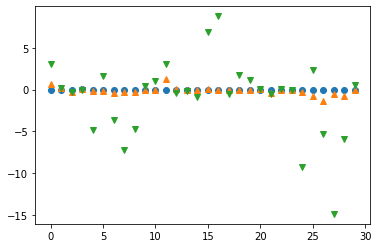

In [33]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression( C=C, penalty="l2", max_iter=100000).fit(X_train, y_train)

    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))

    plt.plot(lr_l1.coef_.T, marker, label=" C={:.3f} ".format(C))


plt.xticks(range(cancer.data.shape[1], cancer.feature_names, rotation=90))
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magniture")

plt.ylim(-5, 5)
plt.legend(loc=3)

    

In [ ]:
#THAT JUST MARKS THE END OF LOGISTIC REGRESSION 
# REMEMBER THAT THE PARAMETER TO BE TUNED IS C, USE MAX_ITER FOR YOUR
# OWN BENEFIT. HAPPY CODING. AND MODELLING.